# Rolling Stone's Top 500 Albums!

This data set, available at data.world, contains the top 500 albums of all time according to Rolling Stone magazine in 2012. I'm curious to see what the breakdown over time and by genre is. Are certain types of music and eras remembered more favorably? My suspicion is that rock and roll from the 60s through late 70s will be most favored, music coinciding with the rise of bands like The Beatles, The Rolling Stones, and the bands that followed them.

Let's see!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Currie32/500-Greatest-Albums/master/albumlist.csv", encoding= 'unicode_escape') #There was a unicode character error in the csv
df.head()

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock


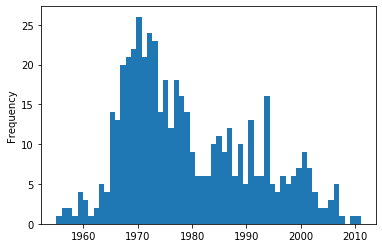

In [3]:
#It's nice we have that Genre column, let's do a quick histogram to see what we've got in there by year

df['Year'].plot(kind='hist', bins=57);


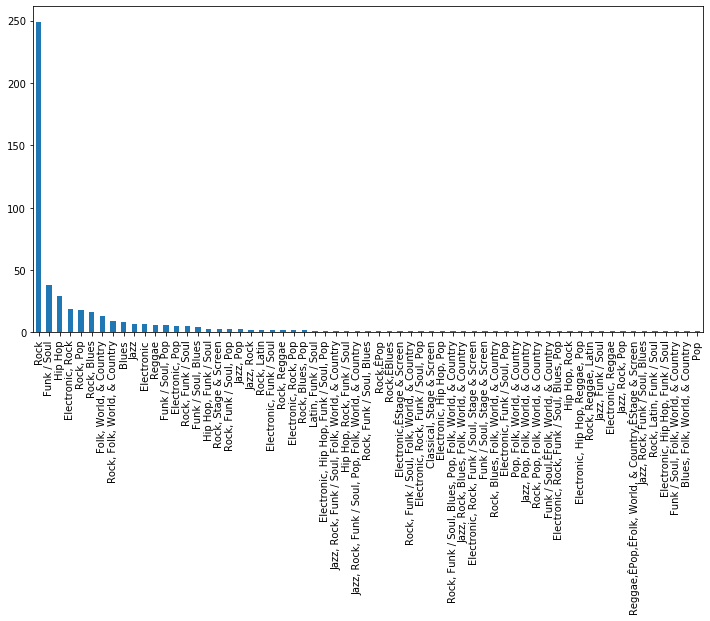

In [4]:
#df['Genre'].value_counts()
df['Genre'].value_counts().plot(kind='bar', figsize=(12,6));

That's kind of helpful. We see the bulk of the awards are late 60s through late 70s and that there's a lot of Rock recognized. Let's see if we can describe how genre changes over that time by cleaning the Genre column.

I need to clean those Genre values up a bit.

I'll tidy this data by defining an observation to be a year and genre combination. An album categorized as "Rock, Pop" in 1967 will be counted as separate observations as 2 observations, a Rubber Soul from The Beatles in 1965 will count as an observation of a Rock album being in the best and a Pop album from 1965 being in the best.

In [5]:
series = df['Genre'].replace('Funk / Soul', 'Funk/Soul', regex = True)
#We needed the regex = True to check for occurences of Funk / Soul within a larger string than "Funk / Soul"
series = series.replace('Hip Hop', 'HipHop', regex = True)
series = series.replace({',':'', ' & ':' ', 'Ê':' ' }, regex = True)
series = series.str.split(' ')
df['Genre_List']=series
df.head()

,Number,Year,Album,Artist,Genre,Subgenre,Genre_List
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",[Rock]
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",[Rock]
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",[Rock]
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",[Rock]
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,"[Rock, Pop]"


In [6]:
# split the list of genres so that each is on its own row
genres = df.apply(lambda r: pd.Series(r['Genre_List']), axis=1).stack()

# the index of this is a multi-index of pairs (i, j), with i being the original index 
# and j being ranked genre. for example, if album 46 has genres [Rock, Pop], there will be two rows:
# (46, 0, Rock) and (46, 1, Pop)

# this line removes that second index
genres.reset_index(level=1, drop=True, inplace=True)
genres.name = 'genre'
genres

genres[:20]

0          Rock
1          Rock
2          Rock
3          Rock
4          Rock
4           Pop
5     Funk/Soul
6          Rock
7          Rock
8          Rock
8         Blues
9          Rock
10         Rock
11         Jazz
12         Rock
13         Rock
14         Rock
14        Blues
15         Rock
16         Rock
Name: genre, dtype: object

In [7]:
# join this to the original dataframe. This will create a new row for each genre. Only keep the year/genre pair
big_df = df.join(genres)[['Year', 'genre']]
big_df[:8]

,Year,genre
0,1967,Rock
1,1966,Rock
2,1966,Rock
3,1965,Rock
4,1965,Rock
4,1965,Pop
5,1971,Funk/Soul
6,1972,Rock


In [8]:
# pivot to get an incidence matrix
pivot_df = big_df.pivot_table(
    index='Year',
    columns='genre',
    aggfunc=len).fillna(0)
pivot_df

genre,Blues,Classical,Country,Electronic,Folk,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
Year,,,,,,,,,,,,,,,
1955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1957,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
1958,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1960,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1961,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1963,0.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,1.0


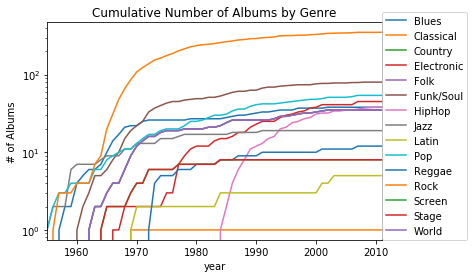

In [9]:
fig, ax = plt.subplots()
sum_df = pivot_df.cumsum(axis=0)
sum_df.plot(
    ax=ax, 
    logy=True, 
    legend=False)
ax.set_title("Cumulative Number of Albums by Genre")
ax.set_ylabel("# of Albums")
ax.set_xlabel("year")
ax.legend(loc=(1, 0));

In [10]:
# which genres coincide per year?
corr_df = pivot_df.corr()
corr_df


genre,Blues,Classical,Country,Electronic,Folk,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
genre,,,,,,,,,,,,,,,
Blues,1.000000,0.042509,0.277635,-0.054297,0.277635,0.298359,-0.156389,0.073674,-0.146969,0.180962,-0.171604,0.371044,0.069204,0.069204,0.277635
Classical,0.042509,1.000000,0.383133,-0.095007,0.383133,0.221105,-0.092993,-0.061937,0.430644,-0.143574,-0.055048,0.316808,0.290616,0.290616,0.383133
Country,0.277635,0.383133,1.000000,-0.096003,1.000000,0.613050,0.048854,0.177153,0.365234,0.288980,-0.061052,0.554228,0.376031,0.376031,1.000000
Electronic,-0.054297,-0.095007,-0.096003,1.000000,-0.096003,-0.082729,0.373394,-0.090468,-0.000981,0.321703,0.219464,0.115051,-0.056243,-0.056243,-0.096003
Folk,0.277635,0.383133,1.000000,-0.096003,1.000000,0.613050,0.048854,0.177153,0.365234,0.288980,-0.061052,0.554228,0.376031,0.376031,1.000000
Funk/Soul,0.298359,0.221105,0.613050,-0.082729,0.613050,1.000000,-0.026453,0.090295,0.154028,0.237107,0.344011,0.655741,0.417221,0.417221,0.613050
HipHop,-0.156389,-0.092993,0.048854,0.373394,0.048854,-0.026453,1.000000,-0.243071,0.038642,0.027197,-0.074092,-0.236549,-0.202097,-0.202097,0.048854
Jazz,0.073674,-0.061937,0.177153,-0.090468,0.177153,0.090295,-0.243071,1.000000,0.025737,0.151589,-0.003290,0.144402,0.138945,0.138945,0.177153
Latin,-0.146969,0.430644,0.365234,-0.000981,0.365234,0.154028,0.038642,0.025737,1.000000,-0.125949,0.110784,0.253511,0.359914,0.359914,0.365234


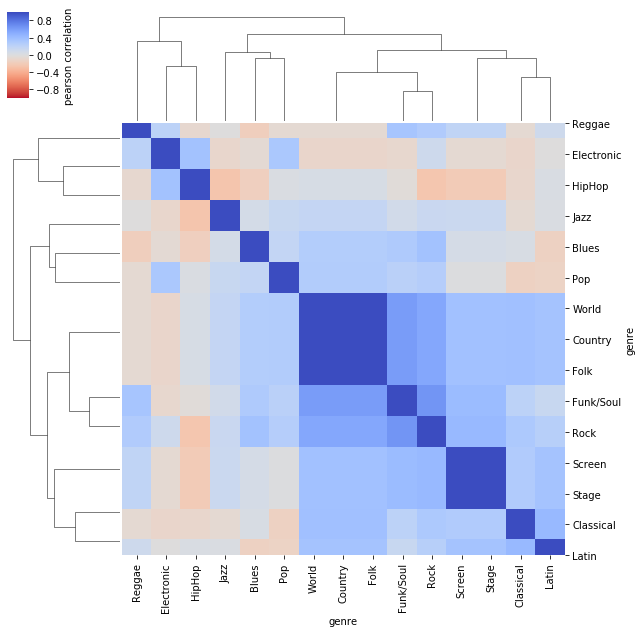

In [11]:
import seaborn as sns # fun plotting library

# create a mask of ones in the upper triangle
sns.clustermap(
    corr_df,
    vmin=-1,
    vmax=1,
    cmap='coolwarm_r',
    cbar_kws={'label': 'pearson correlation'}
)

In [11]:
big_df[:8]

,Year,genre
0,1967,Rock
1,1966,Rock
2,1966,Rock
3,1965,Rock
4,1965,Rock
4,1965,Pop
5,1971,Funk/Soul
6,1972,Rock


In [12]:
#Let's look at how much of the data was pre 1980

len(df[df['Year']<1980])

301

In [13]:
test_df = pd.get_dummies(big_df['genre'],drop_first=True)
test_df = test_df.sum(level=[0])
test_df

,Classical,Country,Electronic,Folk,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,1,0,0,0
496,0,0,0,0,0,0,0,0,0,0,1,0,0,0
497,0,0,0,0,0,0,0,0,0,0,1,0,0,0
498,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df = pd.concat([df, test_df], axis=1).reindex(df.index)

In [18]:
#So now I can easily filter the data set by Genre. Let's see what all the HipHop albums ranked in the top 500
df[df['HipHop']==1]

,Number,Year,Album,Artist,Genre,Subgenre,Genre_List,Classical,Country,Electronic,...,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
47,48,1988,It Takes a Nation of Millions to Hold Us Back,Public Enemy,Hip Hop,Conscious,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
117,118,2005,Late Registration,Kanye West,Hip Hop,None,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
122,123,1986,Raising Hell,Run D.M.C.,Hip Hop,None,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
133,134,1994,Ready to Die,The Notorious B.I.G.,Hip Hop,Thug Rap,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
137,138,1992,The Chronic,Dr. Dre,Hip Hop,Gangsta,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
143,144,1988,Straight Outta Compton,N.W.A,Hip Hop,Gangsta,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
152,153,1991,The Low End Theory,A Tribe Called Quest,Hip Hop,Conscious,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
155,156,1989,Paul's Boutique,Beastie Boys,"Hip Hop, Rock, Funk / Soul","Alternative Rock, Pop Rap, Psychedelic","[HipHop, Rock, Funk/Soul]",0,0,0,...,1,1,0,0,0,0,1,0,0,0
218,219,1986,Licensed to Ill,Beastie Boys,Hip Hop,None,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0
227,228,1987,Paid in Full,Eric B. & Rakim,Hip Hop,None,[HipHop],0,0,0,...,0,1,0,0,0,0,0,0,0,0


We can also quickly see there are 38 HipHop albums in the top 500

In [19]:
len(df[df['HipHop']==1])

38

Now I can use group by commands to extract Genre graphs over time. 

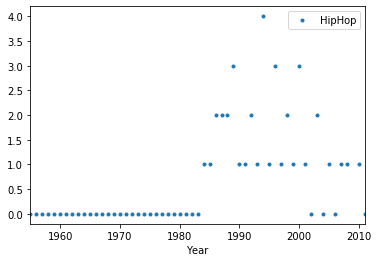

In [20]:
df.groupby('Year').sum()['HipHop'].plot(style='.',legend=True); #I don't like the connecting lines since my data is somewhat discrete

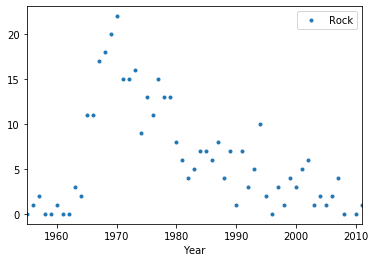

In [21]:
df.groupby('Year').sum()['Rock'].plot(style='.', legend=True);

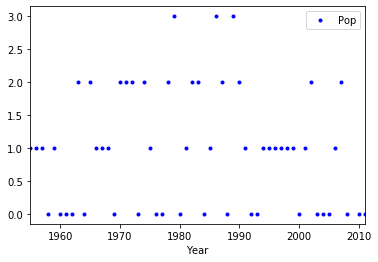

In [22]:
df.groupby('Year').sum()['Pop'].plot(style='.', color = 'blue',legend=True);

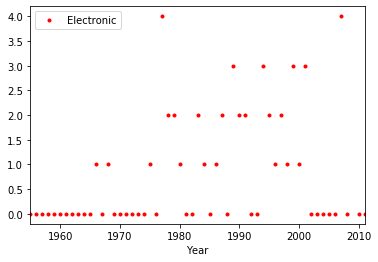

In [23]:
df.groupby('Year').sum()['Electronic'].plot(style='.', color='red',legend=True);

A couple observations I have from these graphs:
1. It's mostly as we expected, Rock-heavy and a lot from the 60s/70s.
2. I thought it was interesting there's nearly 1 pop album per year on average.
3. Electronic appears earlier than I had thought, with 4 albums in 1977! As I wrap up exploring this, I should look up what those early Electronic albums are.

In [24]:
df[df['Electronic']==1].sort_values(by=['Year'])

,Number,Year,Album,Artist,Genre,Subgenre,Genre_List,Classical,Country,Electronic,...,Funk/Soul,HipHop,Jazz,Latin,Pop,Reggae,Rock,Screen,Stage,World
245,246,1966,Freak Out!,The Mothers of Invention,"Electronic, Rock","Musique Concr?te, Avantgarde, Symphonic Rock, ...","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
296,297,1968,We're Only in It for the Money,The Mothers of Invention,"Electronic, Rock","Modern Classical, Avantgarde, Psychedelic Rock...","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
428,429,1975,Another Green World,Brian Eno,Electronic,"Experimental, Ambient",[Electronic],0,0,1,...,0,0,0,0,0,0,0,0,0,0
440,441,1977,Suicide,Suicide,"Electronic, Rock","New Wave, Experimental","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
255,256,1977,Trans Europa Express,Kraftwerk,Electronic,Electro,[Electronic],0,0,1,...,0,0,0,0,0,0,0,0,0,0
250,251,1977,Low,David Bowie,"Electronic, Rock","Art Rock, Ambient, Experimental","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
131,132,1977,Saturday Night Fever: The Original Movie Sound...,Various Artists,"Electronic,ÊStage & Screen","Soundtrack,ÊDisco","[Electronic, Stage, Screen]",0,0,1,...,0,0,0,0,0,0,0,1,1,0
283,284,1978,The Cars,The Cars,"Electronic, Rock","New Wave, Pop Rock, Synth-pop","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
139,140,1978,Parallel Lines,Blondie,"Electronic, Rock","New Wave, Pop Rock, Punk, Disco","[Electronic, Rock]",0,0,1,...,0,0,0,0,0,0,1,0,0,0
151,152,1979,The B 52's / Play Loud,The B 52's,"Electronic, Rock, Pop","New Wave, Punk, Mod","[Electronic, Rock, Pop]",0,0,1,...,0,0,0,0,1,0,1,0,0,0


The Mothers of Invention, a Frank Zappa band. That makes sense.

I might also be interested in looking at the rise and fall of various bands. Did certain bands need to "move out of the way" to let other greats in?

As per genre breakdown, I could pull another data set, maybe Billboard data and see how representation of genres among the most played music changes over time. 